# S06 - Exercices après le cours : Analyse descriptive et visualisation (solution)

## Instructions
Pour chaque exercice, vous avez une cellule de code pour la réponse en dessous, où vous devez écrire votre réponse entre les lignes contenant `### commencez votre code ici ###` et `### terminez votre code ici ###`. Votre code peut contenir une ou plusieurs lignes et vous pouvez exécuter cette cellule afin de terminer l'exercice. Pour exécuter la cellule, vous pouvez taper `Shift+Enter` ou appuyer sur le bouton de lecture dans la barre d'outils ci-dessus. Vos résultats apparaîtront juste en dessous de cette cellule de réponse.

REMARQUE : Veuillez prêter attention au nom de la variable de sortie que vous devez fournir pour chaque question. Vous devez utiliser le même nom de variable pour la sortie afin que le résultat puisse être imprimé correctement.

# Analyse et visualisation de statistiques sur les cultures dans les Amériques
Dans ce notebook, vous allez mettre en œuvre une visualisation des données sur des statistiques des cultures dans les Amériques. Ces données sont disponibles dans le fichier CSV `Production_Crops_E_Americas.csv`, adapté des données fournies par l'Organisation des Nations Unies pour l'alimentation et l'agriculture (FAO). Les fichiers originaux peuvent être trouvés à [cette page](https://data.world/agriculture/crop-production).

Voici une description des colonnes de ces données adaptées :

| NOM DE LA VARIABLE | DESCRIPTION |  
|:----|:----|  
|area_code| valeur numérique représentant la zone |  
|area| nom de la zone (par exemple, Argentine, Canada, Chili, Colombie) |  
|item_code| valeur numérique représentant l'article |  
|item| nom du produit (par exemple, Bananes, Haricots, Manioc) |  
|element_code| valeur numérique représentant l'élément |  
|element| spécification des données (par exemple, Superficie Récoltée, Rendement, Production) |  
|unit| unité de mesure (par exemple, ha - *hectare* -, hg/ha - *hectogramme par hectare* -, et tonnes) |  
|Y2000| récolte de l'année 2000 |  
|...| ... |  
|Y2014| récolte de l'année 2014 |

## Préparation des données : importation de librairies et d'ensembles de données

Dans la cellule de code ci-dessous, importez la librairie `pandas` sous l'alias `pd` ; la librairie `seaborn` sous l'alias `sns` ; et la librairie `matplotlib.pyplot` sous l'alias `plt`.

**IMPORTANT :** Il vous suffit d'exécuter les cellules de code ci-dessous pour prétraiter les données jusqu'à ce que le DataFrame `df_transformed` soit généré (avant l'exercice 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importez le fichier de données `Production_Crops_E_Americas.csv` dans un DataFrame nommé `df_crops`.

**Remarque :** vous pouvez utiliser la fonction `pandas.read_csv()` et le paramètre `encoding` défini sur `latin-1'` pour éviter les erreurs dues aux caractères spéciaux dans le fichier de données.

In [2]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/Production_Crops_E_Americas.csv'
df_crops = pd.read_csv(url, encoding='latin-1')  # lecture d'un fichier de données dans un DataFrame
df_crops.head()
    
# remplacement des valeurs manquantes par 0
df_crops.fillna(0, inplace=True) 

df_crops.head()

,area_code,area,item_code,item,element_code,element,unit,Y2000,Y2001,Y2002,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
0,9,Argentina,44,Barley,5312,Area harvested,ha,247830.0,246490.0,250760.0,...,267450.0,337592.0,416325.0,570125.0,502640.0,746435.0,1121278.0,1694545.0,1203306.0,888873.0
1,9,Argentina,44,Barley,5419,Yield,hg/ha,29153.0,21504.0,21927.0,...,29891.0,37574.0,35417.0,29500.0,26974.0,39710.0,36439.0,30440.0,39102.0,32642.0
2,9,Argentina,44,Barley,5510,Production,tonnes,722490.0,530045.0,549830.0,...,799423.0,1268465.0,1474510.0,1681880.0,1355801.0,2964075.0,4085770.0,5158180.0,4705160.0,2901492.0
3,9,Argentina,44,Barley,5525,Seed,tonnes,30800.0,31700.0,40500.0,...,40303.0,48391.0,64815.0,59937.0,83096.0,128385.0,128385.0,128385.0,0.0,0.0
4,19,Bolivia (Plurinational State of),44,Barley,5312,Area harvested,ha,88569.0,89476.0,88140.0,...,92083.0,92619.0,93260.0,93991.0,55943.0,57451.0,57834.0,53133.0,57240.0,59751.0


Étant donné que les données se trouvent dans une structure pivot, nous les transformons à l'aide de la fonction `pd.melt(...)` pour les dé-pivoter et réorganiser les années en une seule colonne. Voir [ce lien](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).

In [3]:
df_unpivot = pd.melt(df_crops, 
                     id_vars=['item', 'area', 'element'], 
                     value_vars=[f'Y20{i:02d}' for i in range(15)], 
                     var_name='year', value_name='value') 
df_unpivot

,item,area,element,year,value
0,Barley,Argentina,Area harvested,Y2000,247830.0
1,Barley,Argentina,Yield,Y2000,29153.0
2,Barley,Argentina,Production,Y2000,722490.0
3,Barley,Argentina,Seed,Y2000,30800.0
4,Barley,Bolivia (Plurinational State of),Area harvested,Y2000,88569.0
...,...,...,...,...,...
89290,Yams,Trinidad and Tobago,Production,Y2014,103.0
89291,Yams,Venezuela (Bolivarian Republic of),Area harvested,Y2014,5497.0
89292,Yams,Venezuela (Bolivarian Republic of),Yield,Y2014,92081.0
89293,Yams,Venezuela (Bolivarian Republic of),Production,Y2014,50617.0


Nous transformons ensuite les données et plaçons les valeurs dans des colonnes séparées pour les variables.

In [4]:
df_transformed = df_unpivot.pivot(index=["item", "area", "year"], 
                                  columns='element', values='value').reset_index()
df_transformed

element,item,area,year,Area harvested,Production,Seed,Yield
0,Barley,Argentina,Y2000,247830.0,722490.0,30800.0,29153.0
1,Barley,Argentina,Y2001,246490.0,530045.0,31700.0,21504.0
2,Barley,Argentina,Y2002,250760.0,549830.0,40500.0,21927.0
3,Barley,Argentina,Y2003,334348.0,1005460.0,33000.0,30072.0
4,Barley,Argentina,Y2004,275307.0,894610.0,32500.0,32495.0
...,...,...,...,...,...,...,...
28240,Yams,Venezuela (Bolivarian Republic of),Y2010,9814.0,93979.0,5157.0,95760.0
28241,Yams,Venezuela (Bolivarian Republic of),Y2011,10314.0,104295.0,5446.0,101120.0
28242,Yams,Venezuela (Bolivarian Republic of),Y2012,7799.0,70501.0,7406.0,90397.0
28243,Yams,Venezuela (Bolivarian Republic of),Y2013,5264.0,50487.0,7406.0,95910.0


## Exercice 1 : Visualisations
**a)** Explorons la production de certains produits au Canada de 2000 à 2014. Pour cela, nous séparons d'abord les données qui nous intéressent. Plus précisément, nous nous intéressons uniquement aux données de `df_transformed` en fonction des conditions suivantes

* la zone est `'Canada'`
* liste des articles (produits) à analyser : `'Blueberries'`, `'Raspberries'` et `'Strawberries'`

Veuillez placer le DataFrame résultant dans un nouvel objet DataFrame `df_canada`.

In [5]:
### commencez votre code ici ###
df_canada = df_transformed[(df_transformed.area == 'Canada') 
                           & ((df_transformed.item == 'Blueberries') 
                              | (df_transformed.item == 'Raspberries')
                              | (df_transformed.item ==  'Strawberries'))]
# ou de manière équivalente :
# df_canada = df_transformed[(df_transformed.area == 'Canada') &
#                            (df_transformed.item.isin(['Blueberries', 'Raspberries', 'Strawberries']))]
df_canada.head()
### terminez votre code ici ###

element,item,area,year,Area harvested,Production,Seed,Yield
1035,Blueberries,Canada,Y2000,23921.0,59035.0,NaN,24679.0
1036,Blueberries,Canada,Y2001,25000.0,67708.0,NaN,27083.0
1037,Blueberries,Canada,Y2002,25817.0,64861.0,NaN,25123.0
1038,Blueberries,Canada,Y2003,27142.0,78608.0,NaN,28962.0
1039,Blueberries,Canada,Y2004,28162.0,82310.0,NaN,29227.0


**b)** Créez un graphique linéaire à partir du DataFrame `df_canada` pour afficher la production de `'Blueberries'`, `'Raspberries'` et `'Strawberries'` au Canada. Configurez l'esthétique de votre graphique comme suit.

* Définissez la taille de la figure sur `(12, 6)`
* Donnez le titre `'Annual Production in Canada'` au graphique
* Définissez les étiquettes des axes x et y comme `'Year'` et `'Tonnes'`, respectivement
* Chaque élément doit apparaître comme une ligne distincte dans le graphique en utilisant les arguments `hue="item"`, `style="item"` et `markers=True`

**Indice**:

* Utilisez la fonction `seaborn.lineplot()` pour dessiner un tracé linéaire avec plusieurs groupes sémantiques (par exemple, pour différencier les éléments). Consultez [cette page](https://seaborn.pydata.org/generated/seaborn.lineplot.html) pour plus d'informations sur cette fonction.
* Utilisez les fonctions `plt.title()` et `plt.figure()` pour définir respectivement le titre et la taille du graphique.

c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


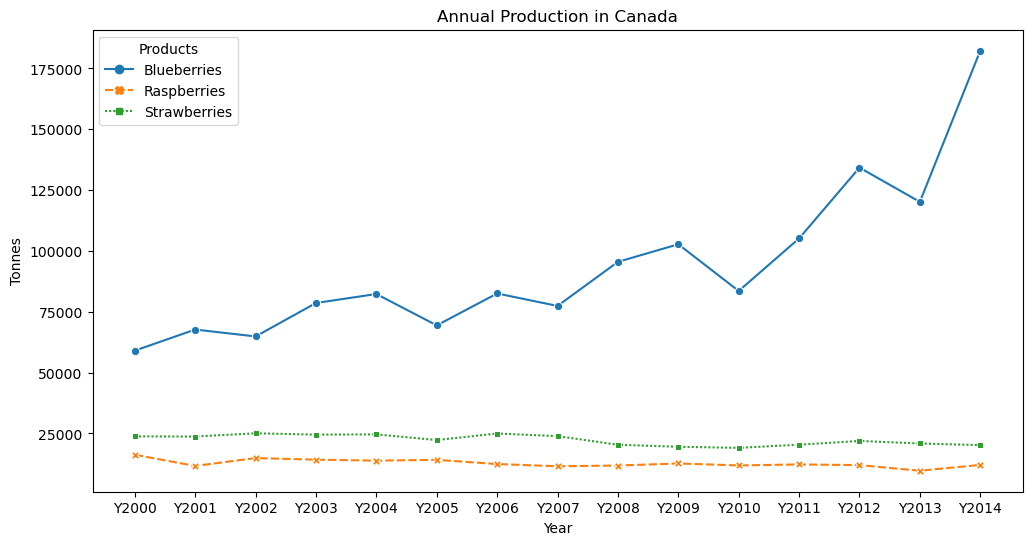

In [6]:
### commencez votre code ici ###
plt.figure(figsize=(12, 6))             # définir la taille du graphique
plt.title('Annual Production in Canada')  # Donner un titre au graphique
g = sns.lineplot(data=df_canada, x='year', y='Production',
                 hue="item", markers=True,  # activation des marques et différenciation par item
                 style='item')
g.set(ylabel='Tonnes', xlabel='Year')    # définir le nom de l'étiquette pour chaque axe
plt.legend(title='Products')                # modifier le titre par défaut de la légende
### terminez votre code ici ###

**c)** Créez un nuage de points à partir du DataFrame `df_canada` pour montrer les relations entre la superficie récoltée et la production des produits sélectionnés au Canada. Configurez l'esthétique de votre graphique comme suit.

* Définissez la taille de la figure sur `(12, 6)`
* Donner un titre significatif au graphique
* Utilisez le style `'white'`
* Définissez les étiquettes des axes x et y comme `'Hectares'` et `'Tonnes'`, respectivement
* Chaque produit doit être différencié à l'aide de l'argument `hue='item'`

**Indice:**
* Utilisez la fonction `seaborn.scatterplot()` pour dessiner un graphique avec plusieurs groupes sémantiques (par exemple, pour différencier les éléments). Consultez [cette page](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) pour plus d'informations sur cette fonction.

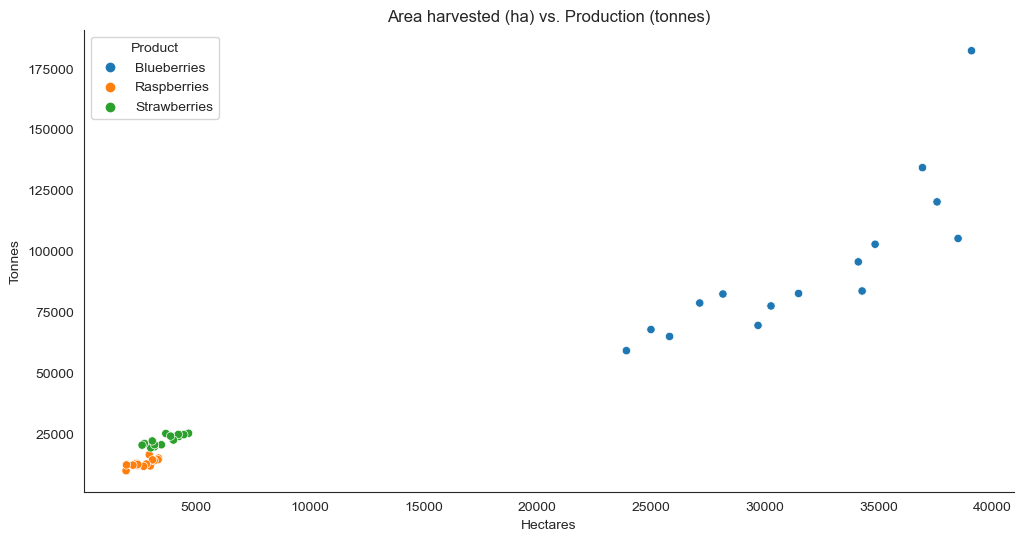

In [7]:
### commencez votre code ici ###
sns.set_style('white')       # établir le style de la figure
plt.figure(figsize=(12,6))   # définir la taille
g = sns.scatterplot(data=df_canada, x='Area harvested', y='Production', hue='item')  # créer la figure
g.set(xlabel='Hectares', ylabel='Tonnes', title='Area harvested (ha) vs. Production (tonnes)') # définir les noms des axes, les étiquettes et le titre
plt.legend(title='Product')  # modifier le nom par défaut de la légende
sns.despine()                # éliminer les frontières
### terminez votre code ici ###

## Exercice 2 : Algorithmes de clustering

**a)** Veuillez filtrer et transformer les données du DataFrame transformé `df_transformed` (qui contient les données de tous les pays) en suivant les étapes suivantes

* Étape 1 : Filtrer uniquement l'élément : `'Grapes'`
* Étape 2 : Utilisez la méthode `DataFrame.groupby()` pour résumer les statistiques par pays (`area`) pour les variables suivantes :
* `'Production'` moyenne par an
* `'Rendement'` moyen par an
* Étape 3 : Supprimez les lignes avec `NaN` (Astuce : vous pouvez utiliser `df = df.dropna(axis='rows')`. Voir [ce lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).
* Étape 4 : standardiser les deux colonnes ci-dessus à l'aide de la transformation z-score et placez-les dans des nouvelles colonnes avec le préfixe `'z_'`

In [8]:
### commencez votre code ici ###
df_summary = df_transformed[df_transformed.item == 'Grapes'
                            ].groupby(['area'])[['Production', 'Yield']].mean()
df_summary = df_summary.dropna(axis='rows')

for col in ['Production', 'Yield']:
    df_summary["z_" + col]  = (df_summary[col] - df_summary[col].mean()) / df_summary[col].std() 

df_summary
### terminez votre code ici ###

element,Production,Yield,z_Production,z_Yield
area,,,,
Argentina,2.618697e+06,122241.000000,1.011876,0.208568
Bolivia (Plurinational State of),2.969147e+04,64885.200000,-0.471604,-1.121191
Brazil,1.299854e+06,173568.266667,0.256189,1.398560
Canada,7.672400e+04,77736.933333,-0.444654,-0.823232
Chile,2.239552e+06,120645.533333,0.794629,0.171578
Colombia,2.600747e+04,133462.600000,-0.473715,0.468734
Cuba,2.153333e+04,121126.133333,-0.476278,0.182721
Ecuador,4.482667e+02,59265.000000,-0.488360,-1.251492
Guatemala,1.649587e+04,73078.466667,-0.479165,-0.931235


**Remarque :** pour les deux questions suivantes, vous pouvez utiliser le code de clustering du cours et l'adapter à ces données.

**b)** Appliquez la méthode $k$-means pour regrouper les pays en fonction du DataFrame récemment créé à l'aide des variables standardisées `["z_Production", "z_Yield"]`. Veuillez comparer les résultats en fonction de $k = 2, 3, ..., 9$ et recommander le meilleur nombre de clusters.

c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\11143054\AppData\Local\miniconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\11143054\AppData\Local\miniconda3\envs\p

<Axes: >

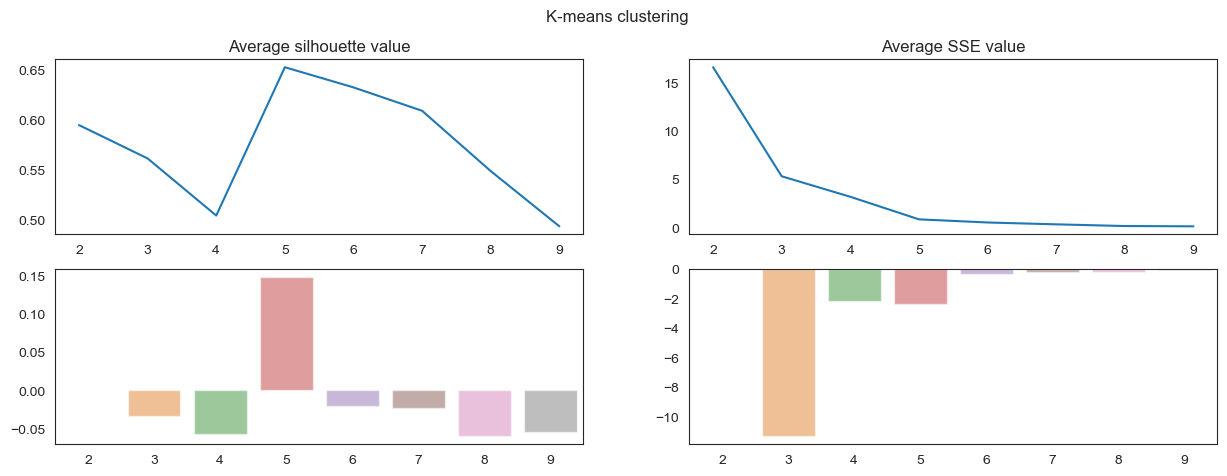

In [9]:
### commencez votre code ici ###
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

X = df_summary[["z_Production", "z_Yield"]]

# énumérer la plage acceptable du nombre de clusters à explorer
kmeans_range = list(range(2,10))

# préparer des listes vides pour stocker les valeurs d'inertie et de silhouette
inertia_list = []
silhouette_list = []

for k in kmeans_range:
    # adapter l'algorithme de clustering
    kmeans_object = KMeans(n_clusters=k, random_state=0).fit(X)

    # obtenir l'inertie et ajouter le résultat à la liste
    inertia_list.append(kmeans_object.inertia_)

    # calculer le score de la silhouette en fournissant des données X et des étiquettes, puis ajouter le résultat à la liste
    silhouette_val = silhouette_score(X, kmeans_object.labels_)
    silhouette_list.append(silhouette_val)

# calculer la différence marginale de silhouette pour chaque étape de k
diff_silhouette = [silhouette_list[i] - silhouette_list[max(0, i-1)] 
                   for i in range(len(kmeans_range))]
# calculer la différence marginale d'inertie pour chaque étape de k
diff_inertia = [inertia_list[i] - inertia_list[max(0, i-1)] 
                for i in range(len(kmeans_range))]

# Tracez les résultats à l'aide de seaborn en utilisant une grille de 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('K-means clustering')

sns.lineplot(ax=axes[0,0], x=kmeans_range, y=silhouette_list).set_title('Average silhouette value')
sns.lineplot(ax=axes[0,1], x=kmeans_range, y=inertia_list).set_title('Average SSE value')
sns.barplot(ax=axes[1,0], x=kmeans_range, y=diff_silhouette, alpha=0.5)
sns.barplot(ax=axes[1,1], x=kmeans_range, y=diff_inertia, alpha=0.5)
### terminez votre code ici ###

**c)** Appliquez la méthode de clustering hiérarchique pour regrouper les pays en utilisant les variables standardisées `["z_Production", "z_Yield"]` et en utilisant $k = 2, 3, 4$. Veuillez ensuite expliquer à quoi ressemble la hiérarchie résultante des clusters. Plus précisément, quels clusters sont agrégés et combinés à partir de $k = 4$ ?

In [10]:
### commencez votre code ici ###
# Regroupement hiérarchique
hcluster2 = AgglomerativeClustering(n_clusters=2).fit(X)
df_summary['A2_cluster'] = hcluster2.labels_
# imprimer le nombre de pays sous chaque groupe
print(df_summary['A2_cluster'].value_counts())

hcluster3 = AgglomerativeClustering(n_clusters=3).fit(X)
df_summary['A3_cluster'] = hcluster3.labels_
# imprimer le nombre de pays sous chaque groupe
print(df_summary['A3_cluster'].value_counts())

hcluster4 = AgglomerativeClustering(n_clusters=4).fit(X)
df_summary['A4_cluster'] = hcluster4.labels_
# imprimer le nombre de pays sous chaque groupe
print(df_summary['A4_cluster'].value_counts())
### terminez votre code ici ###

A2_cluster
0    10
1     6
Name: count, dtype: int64
A3_cluster
0    9
1    6
2    1
Name: count, dtype: int64
A4_cluster
0    7
1    6
3    2
2    1
Name: count, dtype: int64


Text(0.5, 1.0, 'A4_cluster')

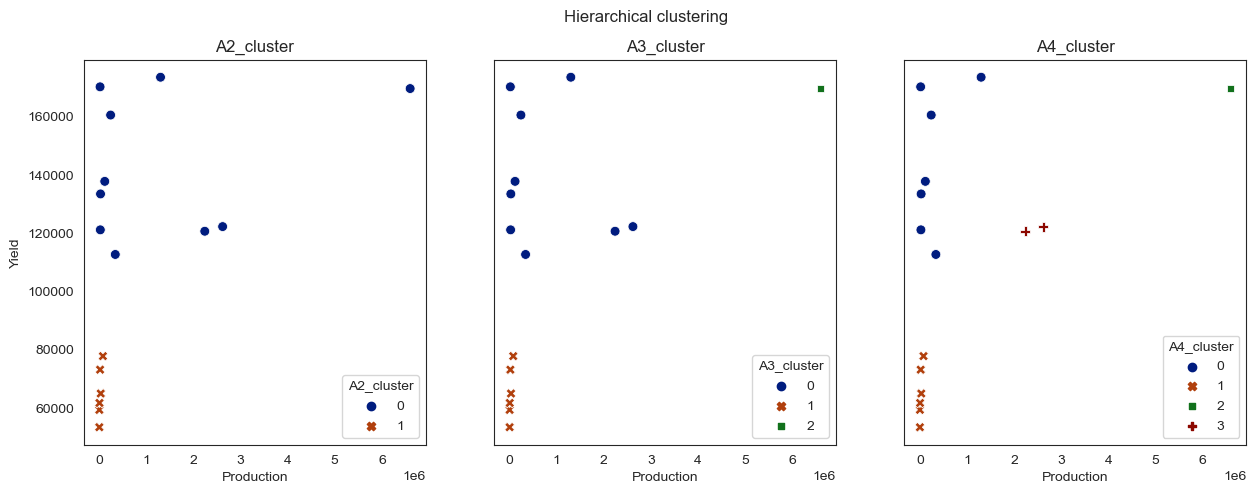

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5),sharey=True)
fig.suptitle('Hierarchical clustering')

# 2 groupes
sns.scatterplot(data = df_summary, ax=axes[0], x='Production', y='Yield',
                hue='A2_cluster', style='A2_cluster', palette='dark', s=50)
axes[0].set_title('A2_cluster')

# 3 groupes
sns.scatterplot(data = df_summary, ax=axes[1], x='Production', y='Yield',
                hue='A3_cluster', style='A3_cluster', palette='dark', s=50)
axes[1].set_title('A3_cluster')

# 4 groupes
sns.scatterplot(data = df_summary, ax=axes[2], x='Production', y='Yield',
                hue='A4_cluster', style='A4_cluster', palette='dark', s=50)
axes[2].set_title('A4_cluster')